# CMIP download, cite and save

Here we show a more involved example of how to download, cite and save CMIP data. For more details on using CMIP data, please see `cmip-licensing-retractions-and-referencing.ipynb`.

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import glob
import os.path
import requests
import zipfile

import matplotlib.pyplot as plt
import netcdf_scm.citing
import netcdf_scm.io
import scmdata
import tqdm.autonotebook as tqdman

/Users/znicholls/miniconda3/envs/calibration-data/lib/python3.7/site-packages/netcdf_scm/citing/__init__.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


<IPython.core.display.Javascript object>

In [3]:
plt.rcParams["figure.figsize"] = (12, 8)

<IPython.core.display.Javascript object>

In [4]:
# file to save the downloaded zip in
ZIP_FILE = os.path.join(".", "cmip_data.zip")
ZIP_FILE

'./cmip_data.zip'

<IPython.core.display.Javascript object>

In [5]:
# directory in which to extra data
DATA_DIR = os.path.join(".", "cmip_data")

<IPython.core.display.Javascript object>

## Download

In [6]:
experiments = (
    "1pctCO2",
    "abrupt-0p5xCO2",
    "abrupt-2xCO2",
    "abrupt-4xCO2",
)
variables = (
    "tas",
    "rsdt",
    "rsut",
    "rlut",
)

for exp in experiments:
    for var in variables:
        print(f"Downloading {exp} {var}")
        params = (
            ("experiment_id", exp),
            ("variable_id", var),
            ("timeseriestype", "average-year-mid-year"),
            ("normalised", "21-yr-running-mean"),
        )
        url = "https://cmip6.science.unimelb.edu.au/api/v1/download_zip"

        r = requests.get(url, params=params)
        r.raise_for_status()

        with open(ZIP_FILE, "wb") as f:
            f.write(r.content)

        zip_ref = zipfile.ZipFile(ZIP_FILE, "r")
        zip_ref.extractall(DATA_DIR)
        zip_ref.close()

print("Finished")

Finished


<IPython.core.display.Javascript object>

## Load data

Now that we have downloaded our data, we can read it using netCDF-SCM.

In [7]:
available_files = glob.glob(os.path.join(DATA_DIR, "**", "*.MAG"), recursive=True)
print(f"{len(available_files)} available files")
available_files[:5]

538 available files


['./cmip_data/average-year-mid-year/CMIP6/CFMIP/MIROC/MIROC6/abrupt-2xCO2/r1i1p1f1/Amon/rlut/gn/v20190705/NORMED_netcdf-scm_rlut_Amon_MIROC6_abrupt-2xCO2_r1i1p1f1_gn_3200-3449.MAG',
 './cmip_data/average-year-mid-year/CMIP6/CFMIP/MIROC/MIROC6/abrupt-2xCO2/r1i1p1f1/Amon/rsut/gn/v20190705/NORMED_netcdf-scm_rsut_Amon_MIROC6_abrupt-2xCO2_r1i1p1f1_gn_3200-3449.MAG',
 './cmip_data/average-year-mid-year/CMIP6/CFMIP/MIROC/MIROC6/abrupt-2xCO2/r1i1p1f1/Amon/rsdt/gn/v20190705/NORMED_netcdf-scm_rsdt_Amon_MIROC6_abrupt-2xCO2_r1i1p1f1_gn_3200-3449.MAG',
 './cmip_data/average-year-mid-year/CMIP6/CFMIP/MIROC/MIROC6/abrupt-2xCO2/r1i1p1f1/Amon/tas/gn/v20190705/NORMED_netcdf-scm_tas_Amon_MIROC6_abrupt-2xCO2_r1i1p1f1_gn_3200-3449.MAG',
 './cmip_data/average-year-mid-year/CMIP6/CFMIP/MIROC/MIROC6/abrupt-0p5xCO2/r1i1p1f1/Amon/rlut/gn/v20190705/NORMED_netcdf-scm_rlut_Amon_MIROC6_abrupt-0p5xCO2_r1i1p1f1_gn_3200-3449.MAG']

<IPython.core.display.Javascript object>

In [8]:
db = [
    netcdf_scm.io.load_mag_file(f, "CMIP6Output" if "CMIP6" in f else "MarbleCMIP5")
    for f in tqdman.tqdm(available_files)
]

  0%|          | 0/538 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

## References

In [9]:
citation_res = netcdf_scm.citing.get_citation_tables(db)

Datasets:   0%|          | 0/538 [00:00<?, ?it/s]

Dependencies:   0%|          | 0/4 [00:00<?, ?it/s]

Dependencies:   0%|          | 0/6 [00:00<?, ?it/s]

Dependencies:   0%|          | 0/6 [00:00<?, ?it/s]

Dependencies:   0%|          | 0/4 [00:00<?, ?it/s]

Dependencies:   0%|          | 0/4 [00:00<?, ?it/s]

Dependencies:   0%|          | 0/6 [00:00<?, ?it/s]

Dependencies:   0%|          | 0/6 [00:00<?, ?it/s]

Dependencies:   0%|          | 0/4 [00:00<?, ?it/s]

Dependencies:   0%|          | 0/6 [00:00<?, ?it/s]

Dependencies:   0%|          | 0/6 [00:00<?, ?it/s]

Dependencies:   0%|          | 0/6 [00:00<?, ?it/s]

Dependencies:   0%|          | 0/6 [00:00<?, ?it/s]

Dependencies:   0%|          | 0/6 [00:00<?, ?it/s]

Dependencies:   0%|          | 0/6 [00:00<?, ?it/s]

Dependencies:   0%|          | 0/6 [00:00<?, ?it/s]

Dependencies:   0%|          | 0/6 [00:00<?, ?it/s]

Dependencies:   0%|          | 0/2 [00:00<?, ?it/s]

Dependencies:   0%|          | 0/2 [00:00<?, ?it/s]

ValueError: No citation could be found for CMIP6.CFMIP.MOHC.HadGEM3-GC31-LL.abrupt-0p5xCO2.
Error was: 504 Server Error: Gateway Time-out for url: https://data.crosscite.org/10.22033%2FESGF%2FCMIP6.5833

<IPython.core.display.Javascript object>

The citation table is a `pd.DataFrame` so it can be converted to latex or other formats using pandas methods (e.g. `to_latex`).

In [ ]:
citation_res["cmip6_references"]

The associated bibtex is simply a list so can trivially be saved to file or whatever other format is required. For example

In [ ]:
print("\n\n".join(citation_res["cmip6_bibtex"]))

The above output could simply be saved to a `.bib` file.

## Save

In [10]:
db = scmdata.run_append(db).filter(region="World")
db.head()

time                                                                                           0001-07-01 00:00:00  \
activity_id climate_model member_id mip_era model       region scenario       unit   variable                        
CFMIP       MIROC6        r1i1p1f1  CMIP6   unspecified World  abrupt-2xCO2   W m^-2 rlut                      NaN   
                                                                                     rsut                      NaN   
                                                                                     rsdt                      NaN   
                                                                              K      tas                       NaN   
                                                               abrupt-0p5xCO2 W m^-2 rlut                      NaN   

time                                                                                           0002-07-01 00:00:00  \
activity_id climate_model member_id mip_era model       region scenario       unit   variable                        
CFMIP       MIROC6        r1i1p1f1  CMIP6   unspecified World  abrupt-2xCO2   W m^-2 rlut                      NaN   
                                                                                     rsut                      NaN   
                                                                                     rsdt                      NaN   
                                                                              K      tas                       NaN   
                                                               abrupt-0p5xCO2 W m^-2 rlut                      NaN   

time                                                                                           0003-07-01 00:00:00  \
activity_id climate_model member_id mip_era model       region scenario       unit   variable                        
CFMIP       MIROC6        r1i1p1f1  CMIP6   unspecified World  abrupt-2xCO2   W m^-2 rlut                      NaN   
                                                                                     rsut                      NaN   
                                                                                     rsdt                      NaN   
                                                                              K      tas                       NaN   
                                                               abrupt-0p5xCO2 W m^-2 rlut                      NaN   

time                                                                                           0004-07-01 00:00:00  \
activity_id climate_model member_id mip_era model       region scenario       unit   variable                        
CFMIP       MIROC6        r1i1p1f1  CMIP6   unspecified World  abrupt-2xCO2   W m^-2 rlut                      NaN   
                                                                                     rsut                      NaN   
                                                                                     rsdt                      NaN   
                                                                              K      tas                       NaN   
                                                               abrupt-0p5xCO2 W m^-2 rlut                      NaN   

time                                                                                           0005-07-01 00:00:00  \
activity_id climate_model member_id mip_era model       region scenario       unit   variable                        
CFMIP       MIROC6        r1i1p1f1  CMIP6   unspecified World  abrupt-2xCO2   W m^-2 rlut                      NaN   
                                                                                     rsut                      NaN   
                                                                                     rsdt                      NaN   
                                                                              K      tas              

<IPython.core.display.Javascript object>

In [11]:
required_vars = {"tas", "rlut", "rsut", "rsdt"}
force_first_year = 1850

out = []
for scdf in tqdman.tqdm(db.groupby(["climate_model", "member_id", "scenario"])):
    climate_model = scdf.get_unique_meta("climate_model", True)
    scenario = scdf.get_unique_meta("scenario", True)
    member_id = scdf.get_unique_meta("member_id", True)
    available_vars = scdf["variable"].unique()
    if not all([v in available_vars for v in required_vars]):
        print(f"Not all required data for {climate_model} {member_id} {scenario}")
        print("Available vars: {}".format(available_vars))
        continue

    rndt = (
        scdf.filter(variable="rsdt")
        .subtract(scdf.filter(variable="rsut"), op_cols={"variable": "rsdt - rsut"})
        .subtract(scdf.filter(variable="rlut"), op_cols={"variable": "rndt"})
    )

    keep = scmdata.run_append([scdf, rndt]).timeseries(
        time_axis="year", drop_all_nan_times=True
    )
    first_year = keep.columns[0]
    keep.columns = keep.columns.map(lambda x: force_first_year + x - first_year)

    out.append(scmdata.ScmRun(keep))

out = scmdata.run_append(out)
out.head()

0it [00:00, ?it/s]

Not all required data for BNU-ESM r1i1p1 1pctCO2
Available vars: ['rlut' 'rsut' 'tas']
Not all required data for FIO-ESM-2-0 r1i1p1f1 1pctCO2
Available vars: ['tas']
Not all required data for FIO-ESM-2-0 r1i1p1f1 abrupt-4xCO2
Available vars: ['tas']
Not all required data for FIO-ESM-2-0 r2i1p1f1 1pctCO2
Available vars: ['tas']
Not all required data for FIO-ESM-2-0 r2i1p1f1 abrupt-4xCO2
Available vars: ['tas']
Not all required data for FIO-ESM-2-0 r3i1p1f1 1pctCO2
Available vars: ['tas']
Not all required data for FIO-ESM-2-0 r3i1p1f1 abrupt-4xCO2
Available vars: ['tas']
Not all required data for GFDL-ESM2G r1i1p2 1pctCO2
Available vars: ['rlut' 'rsut' 'rsdt']
Not all required data for GFDL-ESM2M r1i1p2 1pctCO2
Available vars: ['rlut' 'rsut' 'rsdt']
Not all required data for HadGEM3-GC31-LL r1i1p1f3 abrupt-2xCO2
Available vars: ['rlut']
Not all required data for MPI-ESM-1-2-HAM r1i1p1f1 abrupt-4xCO2
Available vars: ['rlut' 'rsdt' 'tas']
Not all required data for NorESM2-MM r1i1p1f1 1pctC

time                                                                                                1850-01-01  \
activity_id climate_model member_id mip_era model       region scenario unit              variable               
CMIP        ACCESS-CM2    r1i1p1f1  CMIP6   unspecified World  1pctCO2  W m^-2            rlut        0.050348   
                                                                                          rsut       -0.346359   
                                                                                          rsdt       -0.001992   
                                                                        K                 tas         0.010182   
                                                                        watt / meter ** 2 rndt        0.294019   

time                                                                                                1851-01-01  \
activity_id climate_model member_id mip_era model       region scenario unit              variable               
CMIP        ACCESS-CM2    r1i1p1f1  CMIP6   unspecified World  1pctCO2  W m^-2            rlut        0.192558   
                                                                                          rsut       -0.101907   
                                                                                          rsdt       -0.001992   
                                                                        K                 tas        -0.012498   
                                                                        watt / meter ** 2 rndt       -0.092643   

time                                                                                                1852-01-01  \
activity_id climate_model member_id mip_era model       region scenario unit              variable               
CMIP        ACCESS-CM2    r1i1p1f1  CMIP6   unspecified World  1pctCO2  W m^-2            rlut       -0.297373   
                                                                                          rsut       -0.218520   
                                                                                          rsdt        0.006375   
                                                                        K                 tas        -0.060617   
                                                                        watt / meter ** 2 rndt        0.522268   

time                                                                                                1853-01-01  \
activity_id climate_model member_id mip_era model       region scenario unit              variable               
CMIP        ACCESS-CM2    r1i1p1f1  CMIP6   unspecified World  1pctCO2  W m^-2            rlut        0.104946   
                                                                                          rsut       -0.342394   
                                                                                          rsdt       -0.001992   
                                                                        K                 tas         0.042244   
                                                                        watt / meter ** 2 rndt        0.235456   

time                                                                                                1854-01-01  \
activity_id climate_model member_id mip_era model       region scenario unit              variable               
CMIP        ACCESS-CM2    r1i1p1f1  CMIP6   unspecified World  1pctCO2  W m^-2            rlut        0.225155   
                                                                                          rsut       -0.122375   
                                                                                          rsdt       -0.001992   
                                                                        K                 tas         0.078563   
                                                                        watt / meter ** 2 rndt       -0.104772   

time 

<IPython.core.display.Javascript object>

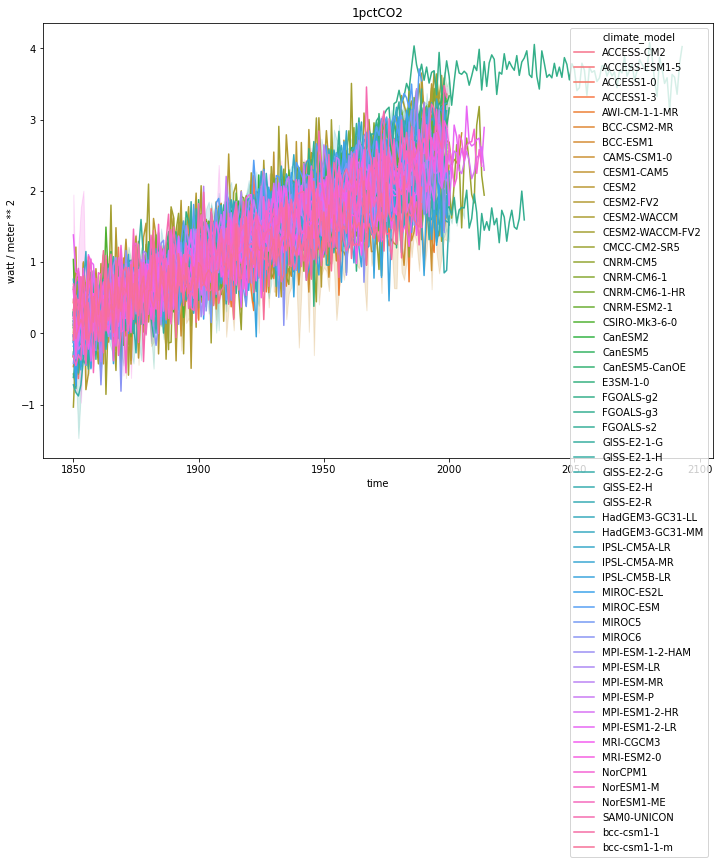

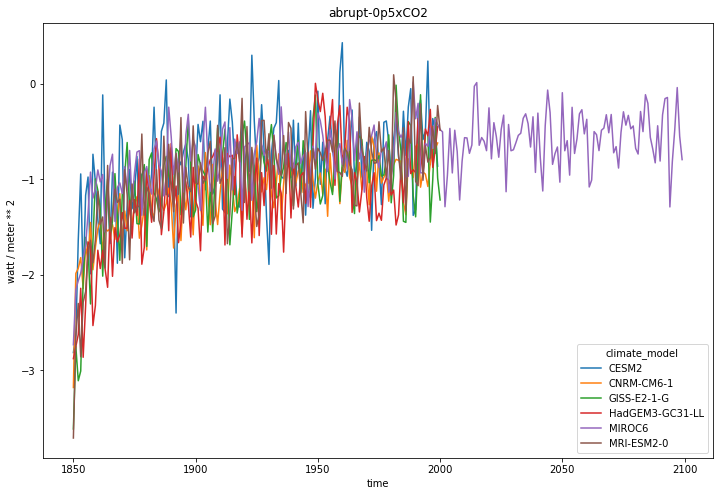

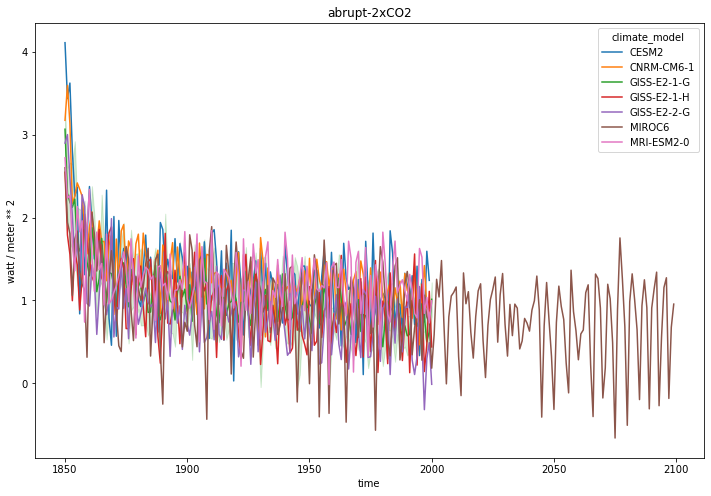

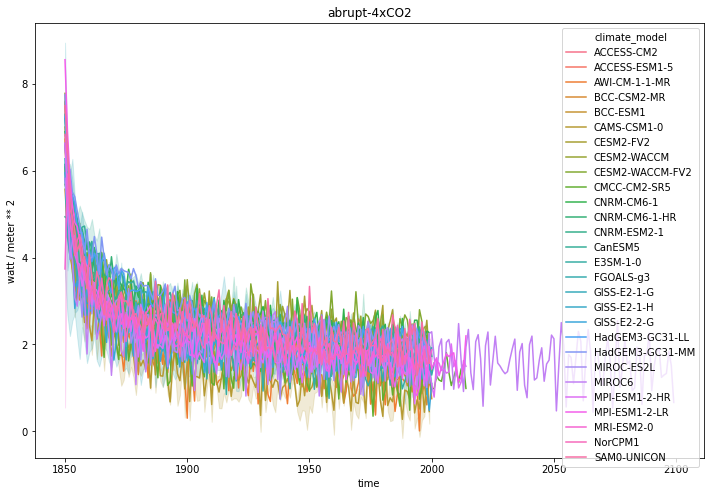

<IPython.core.display.Javascript object>

In [12]:
for sdf in out.groupby("scenario"):
    scenario = sdf.get_unique_meta("scenario", True)
    ax = sdf.filter(variable="rndt").lineplot(hue="climate_model", time_axis="year")
    ax.set_title(scenario)
    plt.show()

In [13]:
out.filter(mip_era="CMIP6").drop_meta("activity_id").head()

time                                                                                    1850-01-01  \
climate_model member_id mip_era model       region scenario unit              variable               
ACCESS-CM2    r1i1p1f1  CMIP6   unspecified World  1pctCO2  W m^-2            rlut        0.050348   
                                                                              rsut       -0.346359   
                                                                              rsdt       -0.001992   
                                                            K                 tas         0.010182   
                                                            watt / meter ** 2 rndt        0.294019   

time                                                                                    1851-01-01  \
climate_model member_id mip_era model       region scenario unit              variable               
ACCESS-CM2    r1i1p1f1  CMIP6   unspecified World  1pctCO2  W m^-2            rlut        0.192558   
                                                                              rsut       -0.101907   
                                                                              rsdt       -0.001992   
                                                            K                 tas        -0.012498   
                                                            watt / meter ** 2 rndt       -0.092643   

time                                                                                    1852-01-01  \
climate_model member_id mip_era model       region scenario unit              variable               
ACCESS-CM2    r1i1p1f1  CMIP6   unspecified World  1pctCO2  W m^-2            rlut       -0.297373   
                                                                              rsut       -0.218520   
                                                                              rsdt        0.006375   
                                                            K                 tas        -0.060617   
                                                            watt / meter ** 2 rndt        0.522268   

time                                                                                    1853-01-01  \
climate_model member_id mip_era model       region scenario unit              variable               
ACCESS-CM2    r1i1p1f1  CMIP6   unspecified World  1pctCO2  W m^-2            rlut        0.104946   
                                                                              rsut       -0.342394   
                                                                              rsdt       -0.001992   
                                                            K                 tas         0.042244   
                                                            watt / meter ** 2 rndt        0.235456   

time                                                                                    1854-01-01  \
climate_model member_id mip_era model       region scenario unit              variable               
ACCESS-CM2    r1i1p1f1  CMIP6   unspecified World  1pctCO2  W m^-2            rlut        0.225155   
                                                                              rsut       -0.122375   
                                                                              rsdt       -0.001992   
                                                            K                 tas         0.078563   
                                                            watt / meter ** 2 rndt       -0.104772   

time                                                                                    1855-01-01  \
climate_model member_id mip_era model       region scenario unit              variable               
ACCESS-CM2    r1i1p1f1  CMIP6   unspecified World  1pctCO2  W m^-2            rlut       -0.192529   
                                                                              rsut        0.032482   
                 

<IPython.core.display.Javascript object>

In [14]:
out.filter(mip_era="CMIP6").drop_meta("activity_id").to_nc(
    "output.nc", dimensions=("scenario", "climate_model", "member_id")
)

<IPython.core.display.Javascript object>